In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import logging 
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pylab as plt

from dagger.graph import DAG
from dagger.query import Query
from dagger.common import make_fake_df, normalise

# logging.basicConfig(
#     level=logging.DEBUG,
#     format='%(asctime)s [%(filename)s:%(funcName)s:%(lineno)d] %(levelname)s - %(message)s',
# )

In [3]:
df = pd.DataFrame({"a": [1, 1, 1, 1, 0, 0, 0, 0], 
                   "b": [0, 1, 0, 1, 1, 1, 1, 0], 
                   "c": [0, 0, 1, 0, 0, 1, 0, 1],
                   "d": [1, 1, 0, 1, 0, 0, 0, 0],
                   "e": [1, 1, 1, 1, 0, 0, 0, 0]})
dag = DAG(df).add_edge("a", "b").add_edge("a", "c").add_edge("c", "b")

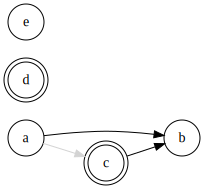

In [4]:
from graphviz import Digraph

def mkplot(dag, givens, dos):
    """A pretty plotting function."""
    d = Digraph()
    d.attr(rankdir='LR')
    d.attr('node', shape='circle')
    for n in dag.graph.nodes:
        if (n in givens) or (n in dos):
            d.node(n, shape='doublecircle')
        else:
            d.node(n)
    for n1, n2 in dag.graph.edges:
        if n2 in dos:
            d.edge(n1, n2, color="lightgray")
        else:
            d.edge(n1, n2)
    return d

mkplot(dag, givens=["d"], dos=["c"])

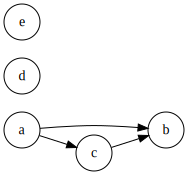

In [5]:
dag.plot()

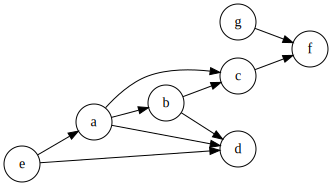

In [6]:
dag = (DAG(make_fake_df(7))
       .add_edge("e", "a")
       .add_edge("e", "d")
       .add_edge("a", "d")
       .add_edge("b", "d")
       .add_edge("a", "b")
       .add_edge("a", "c")
       .add_edge("b", "c")
       .add_edge("c", "f")
       .add_edge("g", "f"))

dag.plot()

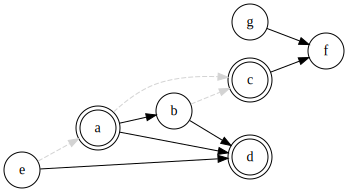

In [7]:
from dagger.query import Query

q = Query(dag).given(d=1).do(a=0, c=1)
q.plot()

In [2]:
help(q.infer())

Object `q.infer()` not found.


In [9]:
Query(dag).given(d=1).do(a=1, c=1).infer()

{'c': {1: 1.0},
 'g': {0: 0.44, 1: 0.56},
 'e': {0: 0.3398786223702805, 1: 0.6601213776297196},
 'b': {0: 0.49352187977097206, 1: 0.5064781202290279},
 'a': {1: 1.0},
 'd': {1: 1.0},
 'f': {0: 0.4161230769230769, 1: 0.5838769230769231}}

Next up: testing for independencies. 

In [10]:
import itertools as it 
import networkx as nx

In [11]:
list(nx.all_simple_paths(dag.graph.to_undirected(), "b", "g"))

[['b', 'a', 'c', 'f', 'g'],
 ['b', 'd', 'a', 'c', 'f', 'g'],
 ['b', 'd', 'e', 'a', 'c', 'f', 'g'],
 ['b', 'c', 'f', 'g']]

In [12]:
nx.k_components(dag.graph.to_undirected())

{2: [{'a', 'b', 'c', 'd', 'e'}], 1: [{'a', 'b', 'c', 'd', 'e', 'f', 'g'}]}